In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
my_data = {
    "country":["Brazil","Russia","India","China","South Africa","Turkey","Germany"],
    "capital":["Brasilia","Moscow","New Delhi","Beijing","Pretoria","Ankara","Berlin"],
    "population":[214,144,1408,1412,60,85,83],
    "area":[8.51,17.1,3.28,9.59,1.22,0.78,0.35]
    }
countries = pd.DataFrame(my_data)
countries.index=["BR","RU","IN","CH","SA","TR","GE"]
print(countries)

         country    capital  population   area
BR        Brazil   Brasilia         214   8.51
RU        Russia     Moscow         144  17.10
IN         India  New Delhi        1408   3.28
CH         China    Beijing        1412   9.59
SA  South Africa   Pretoria          60   1.22
TR        Turkey     Ankara          85   0.78
GE       Germany     Berlin          83   0.35


In [9]:
is_huge = countries ["population"] > 100
is_large_area = countries["area"] > 2
selected_countries = countries[is_huge & is_large_area]
print(selected_countries)

   country    capital  population   area
BR  Brazil   Brasilia         214   8.51
RU  Russia     Moscow         144  17.10
IN   India  New Delhi        1408   3.28
CH   China    Beijing        1412   9.59


In [10]:
for lab, row in countries.iterrows():
    countries.loc[lab,"COUNTRY_UPPER"] = row["country"].upper()
print(countries)

         country    capital  population   area COUNTRY_UPPER
BR        Brazil   Brasilia         214   8.51        BRAZIL
RU        Russia     Moscow         144  17.10        RUSSIA
IN         India  New Delhi        1408   3.28         INDIA
CH         China    Beijing        1412   9.59         CHINA
SA  South Africa   Pretoria          60   1.22  SOUTH AFRICA
TR        Turkey     Ankara          85   0.78        TURKEY
GE       Germany     Berlin          83   0.35       GERMANY


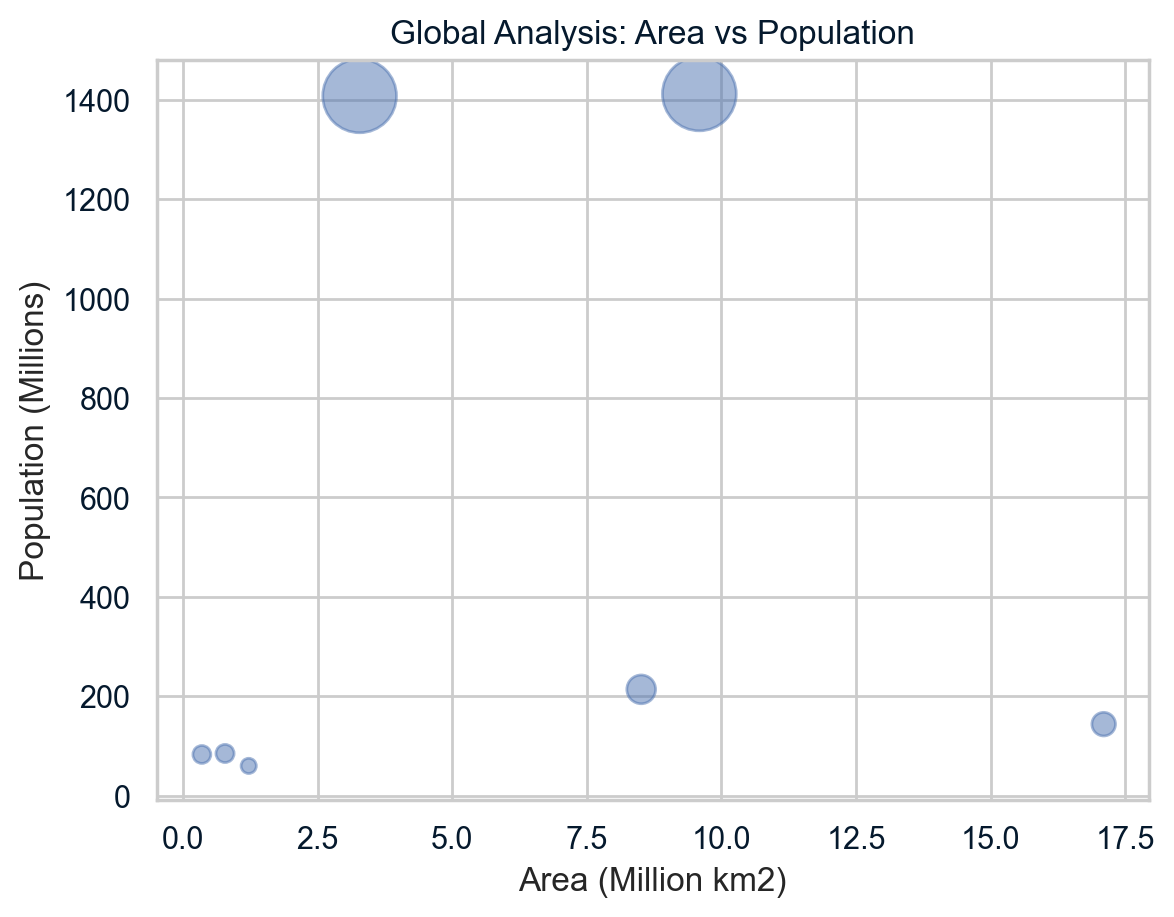

In [11]:
plt.scatter(countries["area"], countries["population"], s=countries["population"]*0.5, alpha=0.5)
plt.title("Global Analysis: Area vs Population")
plt.xlabel("Area (Million km2)")
plt.ylabel("Population (Millions)")
plt.grid(True)
plt.show()

In [12]:
pop_data = {
    "country": ["China", "India", "United States", "Indonesia", "Brazil", "Turkey", "Germany"],
    "continent": ["Asia", "Asia", "Americas", "Asia", "Americas", "Europe", "Europe"],
    "population": [1412, 1408, 331, 273, 214, 85, 83], # Milyon
    "area": [9.59, 3.28, 9.83, 1.90, 8.51, 0.78, 0.35] # Milyon km2
}

# 2. DataFrame oluşturma
df = pd.DataFrame(pop_data)

# 3. İndeksleri belirleme
df.index = ["CH", "IN", "US", "ID", "BR", "TR", "GE"]

print(df)

          country continent  population  area
CH          China      Asia        1412  9.59
IN          India      Asia        1408  3.28
US  United States  Americas         331  9.83
ID      Indonesia      Asia         273  1.90
BR         Brazil  Americas         214  8.51
TR         Turkey    Europe          85  0.78
GE        Germany    Europe          83  0.35


In [13]:
high_pop = df[df["population"] > 200]
print("--- Countries with population > 200M ---")
print(high_pop)
europe_small = df[(df["population"] < 100) & (df["continent"] == "Europe")]
print("\n--- European countries with < 100M population ---")
print(europe_small)

--- Countries with population > 200M ---
          country continent  population  area
CH          China      Asia        1412  9.59
IN          India      Asia        1408  3.28
US  United States  Americas         331  9.83
ID      Indonesia      Asia         273  1.90
BR         Brazil  Americas         214  8.51

--- European countries with < 100M population ---
    country continent  population  area
TR   Turkey    Europe          85  0.78
GE  Germany    Europe          83  0.35


In [14]:
for lab, row in df.iterrows():
    density = row["population"] / row["area"]
    df.loc[lab, "density"] = density
print(df)

          country continent  population  area     density
CH          China      Asia        1412  9.59  147.236705
IN          India      Asia        1408  3.28  429.268293
US  United States  Americas         331  9.83   33.672431
ID      Indonesia      Asia         273  1.90  143.684211
BR         Brazil  Americas         214  8.51   25.146886
TR         Turkey    Europe          85  0.78  108.974359
GE        Germany    Europe          83  0.35  237.142857


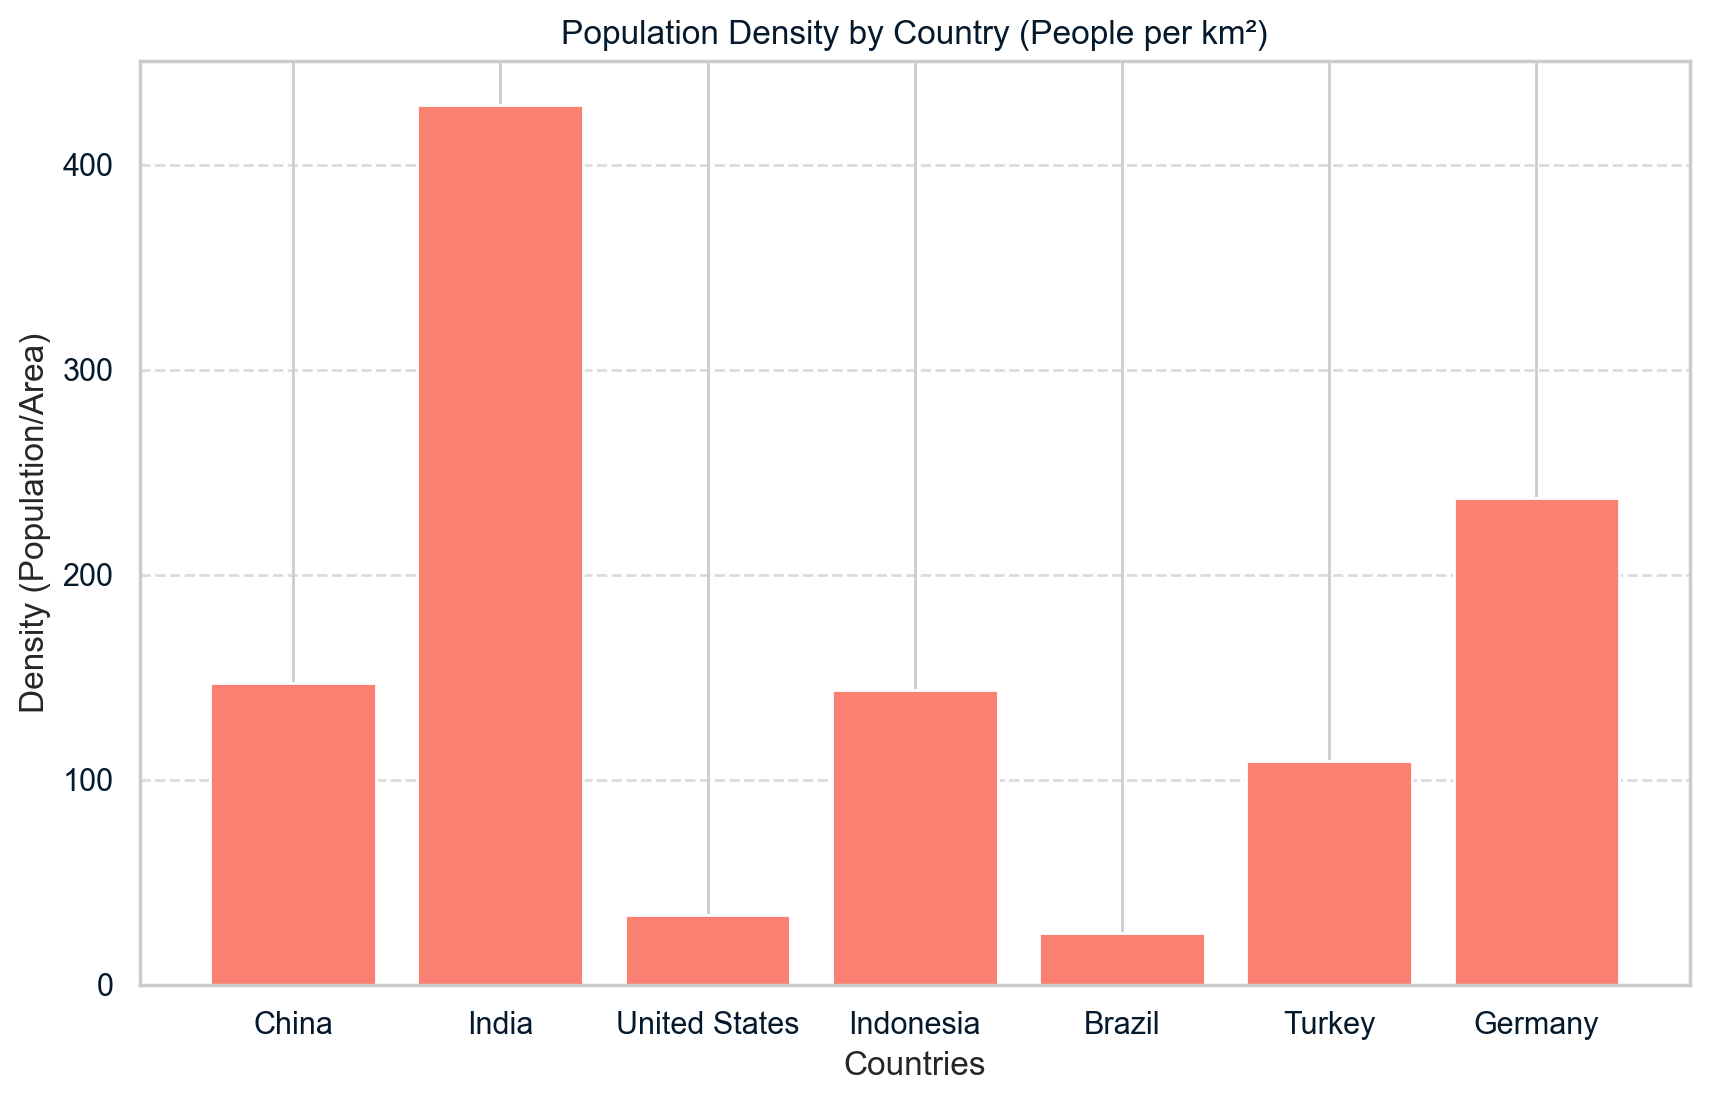

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(df["country"], df["density"], color='salmon')
plt.title("Population Density by Country (People per km²)")
plt.xlabel("Countries")
plt.ylabel("Density (Population/Area)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

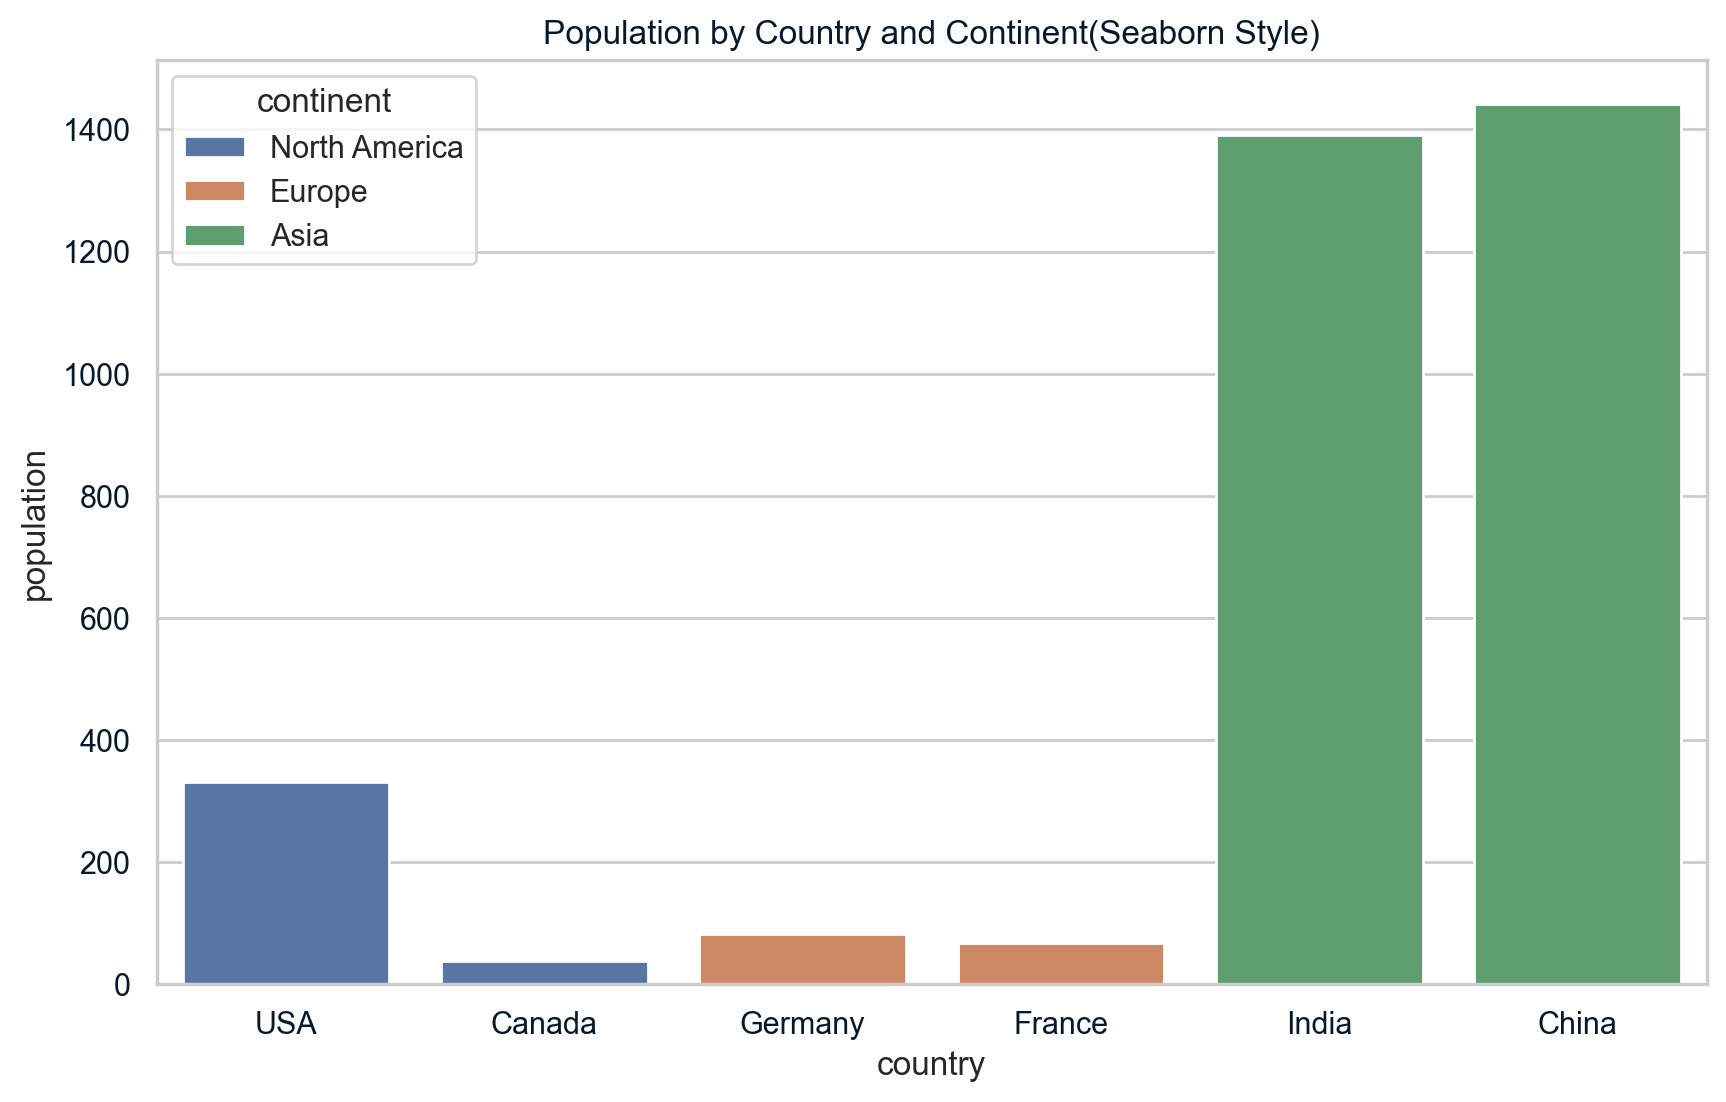

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data to define 'df'
import pandas as pd
df = pd.DataFrame({
    'country': ['USA', 'Canada', 'Germany', 'France', 'India', 'China'],
    'population': [331, 38, 83, 67, 1391, 1441],
    'continent': ['North America', 'North America', 'Europe', 'Europe', 'Asia', 'Asia']
})

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="country", y="population", hue="continent")
plt.title("Population by Country and Continent(Seaborn Style)")
plt.show()

In [17]:
growth_rate = 0.01
years = 10
df["pop_2035_projection"] = df["population"] * ((1 + growth_rate) ** years)
df["pop_2035_projection"] = df["pop_2035_projection"].round(2)
print("--- Population Projection Analysis (2025 vs 2035) ---")
print(df[["country", "population", "pop_2035_projection"]])

--- Population Projection Analysis (2025 vs 2035) ---
   country  population  pop_2035_projection
0      USA         331               365.63
1   Canada          38                41.98
2  Germany          83                91.68
3   France          67                74.01
4    India        1391              1536.53
5    China        1441              1591.76


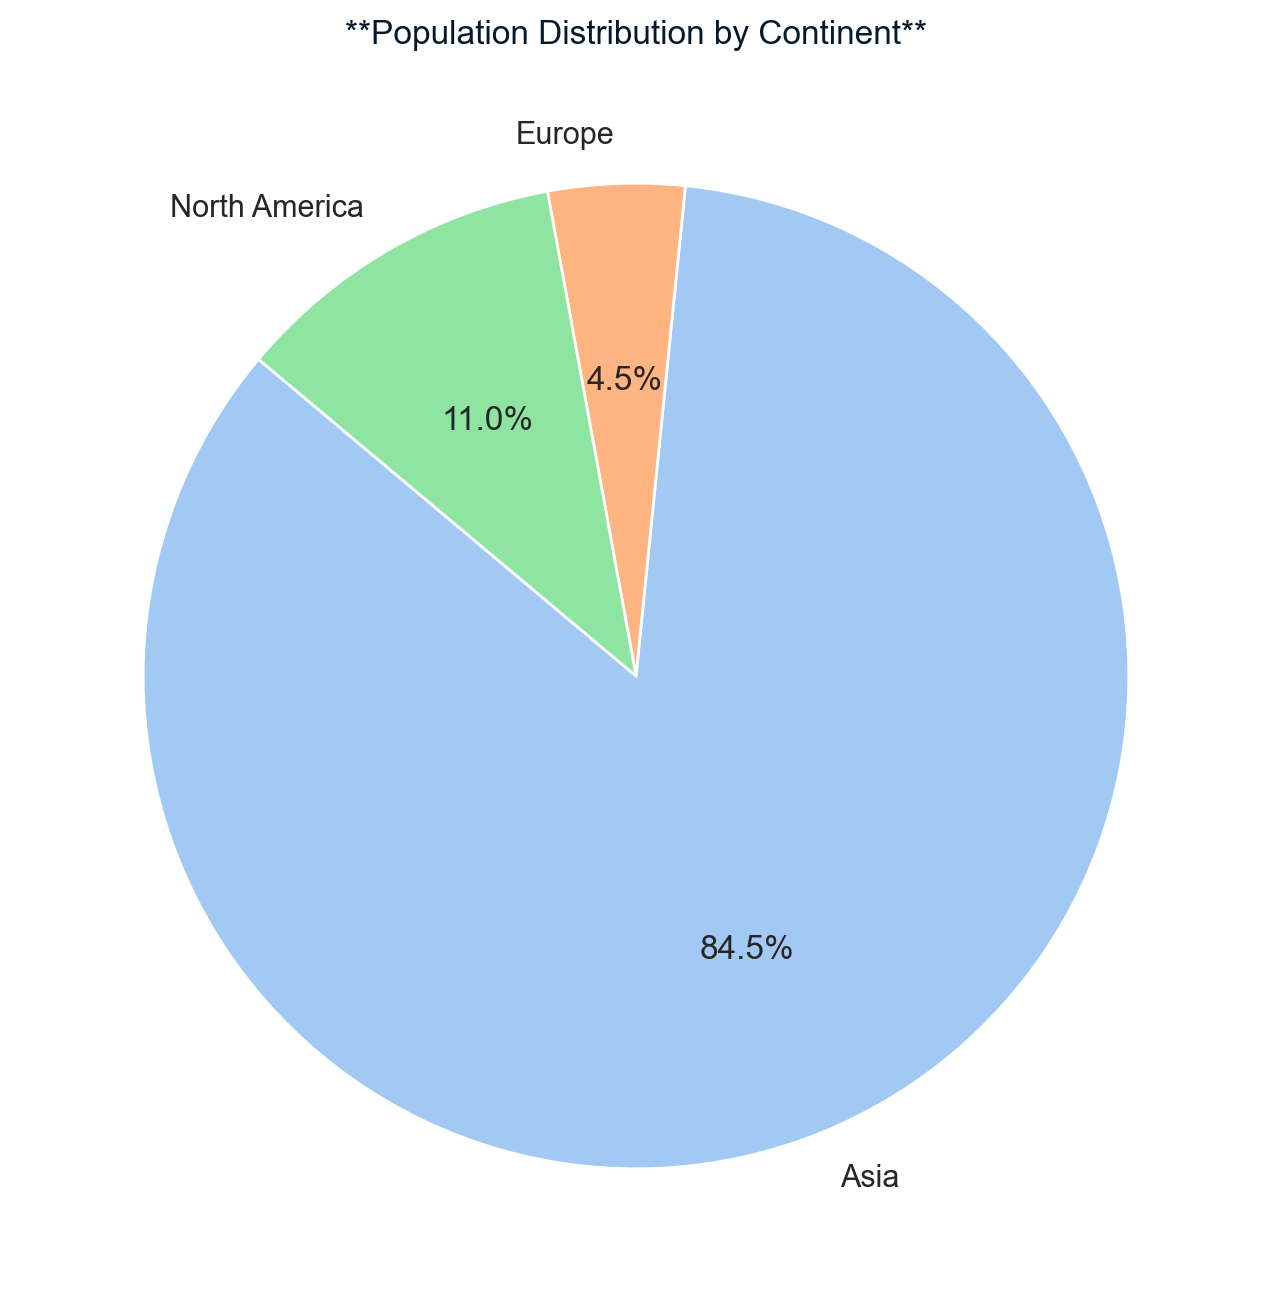

In [18]:
continent_dist = df.groupby("continent")["population"].sum()

plt.figure(figsize=(8, 8))
continent_dist.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("**Population Distribution by Continent**")
plt.ylabel("") # Y ekseni ismini gizle
plt.show()